In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# PART 2

# Question 1 : Download and Describe your choice of a real data set DS 


In [2]:
#Step 2
#extract data and drop unnecessary features
airQ=pd.read_csv(r'C:\Users\cynth\.jupyter\AirQualityData.csv')
airQ=airQ.drop(['No','year','month','day','hour','station'],axis=1)
airQ.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
0,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0
1,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4
2,8.0,8.0,NaN,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7
3,8.0,8.0,3.0,16.0,NaN,NaN,-0.7,1023.5,-20.9,0.0,NW,2.6
4,8.0,8.0,3.0,NaN,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5


In [3]:
#mapping 'wd' values to degrees of a compass
vals=airQ['wd']
x=[]
arr=["N","NNE","NE","ENE","E","ESE", "SE", "SSE","S","SSW","SW","WSW","W","WNW","NW","NNW"]
a=0
for i in range(len(arr)):
    x.append(a) 
    a+=22.5   
y=vals.unique()
x[0]=360
print(x)
for i in y:
    for j in arr:
        if i==j:
            w=(x[arr.index(j)]) 
            for z in range(len(vals)):
                if vals.loc[z]==i:
                    vals.loc[z]=w
                else: 
                    continue
vals.head()               

[360, 22.5, 45.0, 67.5, 90.0, 112.5, 135.0, 157.5, 180.0, 202.5, 225.0, 247.5, 270.0, 292.5, 315.0, 337.5]


C:\Users\cynth\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


0    292.5
1    292.5
2    292.5
3      315
4    292.5
Name: wd, dtype: object

In [4]:
#storing new 'wd' values in data frame
airQ = airQ.assign(wd=vals)
print(airQ.head())

   PM2.5  PM10  SO2   NO2     CO    O3  TEMP    PRES  DEWP  RAIN     wd  WSPM
0    9.0   9.0  6.0  17.0  200.0  62.0   0.3  1021.9 -19.0   0.0  292.5   2.0
1   11.0  11.0  7.0  14.0  200.0  66.0  -0.1  1022.4 -19.3   0.0  292.5   4.4
2    8.0   8.0  NaN  16.0  200.0  59.0  -0.6  1022.6 -19.7   0.0  292.5   4.7
3    8.0   8.0  3.0  16.0    NaN   NaN  -0.7  1023.5 -20.9   0.0    315   2.6
4    8.0   8.0  3.0   NaN  300.0  36.0  -0.9  1024.1 -21.7   0.0  292.5   2.5


In [5]:
#select classes based on CO, duplicate the smallest class (class3) to balance the classes
#combine classes into one data frame
cl1=airQ[airQ['CO']==300]
cl2=airQ[airQ['CO']==900]
cl3=airQ[airQ['CO']==1400]
cl3=cl3.append([cl3],ignore_index=True)
print('number of cases per class after cloning:','class1:',len(cl1),', class2:',len(cl2),', class3:',len(cl3))
data=pd.concat((cl1,cl2,cl3))
print('number of cases in dataframe:',len(data))
data=data.reset_index(drop=True)
data.head(10)

number of cases per class after cloning: class1: 2341 , class2: 1820 , class3: 1842
number of cases in dataframe: 6003


,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
0,8.0,8.0,3.0,NaN,300.0,36.0,-0.9,1024.1,-21.7,0.0,292.5,2.5
1,8.0,8.0,6.0,13.0,300.0,61.0,-2.4,1025.4,-20.3,0.0,45,2.3
2,8.0,8.0,8.0,20.0,300.0,54.0,-0.8,1026.7,-19.9,0.0,22.5,2.0
3,3.0,6.0,9.0,23.0,300.0,50.0,0.4,1027.3,-19.4,0.0,45,2.7
4,3.0,6.0,10.0,18.0,300.0,56.0,1.5,1027.4,-19.7,0.0,67.5,2.9
5,3.0,6.0,11.0,15.0,300.0,61.0,2.1,1027.3,-21.2,0.0,22.5,4.8
6,3.0,6.0,9.0,14.0,300.0,62.0,3.1,1027.2,-21.1,0.0,360,4.1
7,3.0,6.0,8.0,10.0,300.0,67.0,4.7,1026.3,-20.6,0.0,112.5,1.6
8,3.0,9.0,7.0,9.0,300.0,70.0,5.5,1025.2,-20.0,0.0,45,3.1
9,3.0,14.0,7.0,8.0,300.0,72.0,6.6,1024.9,-19.9,0.0,315,2.1


In [6]:
#identify anf fill in measing values with column means
null = data[(data.isnull().any(axis=1))]
print(len(null))
data=round((data.fillna(data.mean())),1)
data.head(10)

139


,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
0,8.0,8.0,3.0,40.3,300.0,36.0,-0.9,1024.1,-21.7,0.0,292.5,2.5
1,8.0,8.0,6.0,13.0,300.0,61.0,-2.4,1025.4,-20.3,0.0,45.0,2.3
2,8.0,8.0,8.0,20.0,300.0,54.0,-0.8,1026.7,-19.9,0.0,22.5,2.0
3,3.0,6.0,9.0,23.0,300.0,50.0,0.4,1027.3,-19.4,0.0,45.0,2.7
4,3.0,6.0,10.0,18.0,300.0,56.0,1.5,1027.4,-19.7,0.0,67.5,2.9
5,3.0,6.0,11.0,15.0,300.0,61.0,2.1,1027.3,-21.2,0.0,22.5,4.8
6,3.0,6.0,9.0,14.0,300.0,62.0,3.1,1027.2,-21.1,0.0,360.0,4.1
7,3.0,6.0,8.0,10.0,300.0,67.0,4.7,1026.3,-20.6,0.0,112.5,1.6
8,3.0,9.0,7.0,9.0,300.0,70.0,5.5,1025.2,-20.0,0.0,45.0,3.1
9,3.0,14.0,7.0,8.0,300.0,72.0,6.6,1024.9,-19.9,0.0,315.0,2.1


In [7]:
#mean and standard deviation of feature columns
a=data.mean()
print('mean of feature values:', '\n', a,'\n')
b=data.std()
print('standard deviation of feature values:','\n',b)

#the means and standard deviations of the features vary a lot, which may falter our results. 
#hence centering and scaling of the data will be beneficial

mean of feature values: 
 PM2.5      52.965317
PM10       80.517908
SO2         9.208063
NO2        40.293353
CO        819.440280
O3         67.400200
TEMP       15.467749
PRES     1011.258171
DEWP        1.965251
RAIN        0.076029
wd        199.453023
WSPM        2.155472
dtype: float64 

standard deviation of feature values: 
 PM2.5     47.751681
PM10      69.777006
SO2       12.820649
NO2       27.247830
CO       458.962603
O3        54.672006
TEMP      10.637249
PRES      10.577443
DEWP      14.593480
RAIN       0.951092
wd       103.795288
WSPM       1.448398
dtype: float64


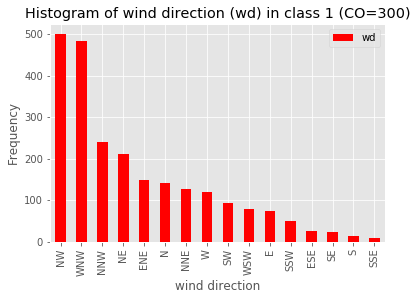

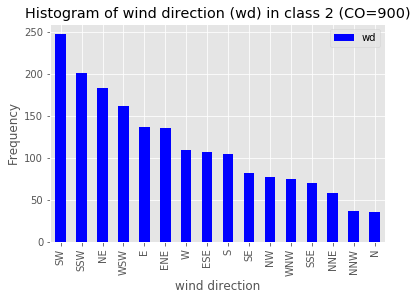

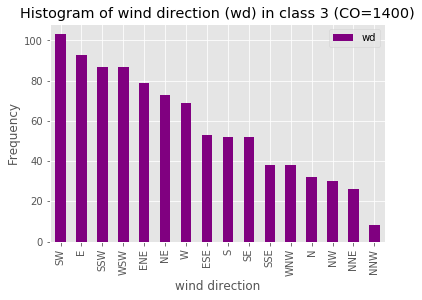

In [8]:
#histograms for original discrete features that were kept
#binary features are coded for these discrete features in previous cells

dummy=pd.read_csv(r'C:\Users\cynth\.jupyter\AirQualityData.csv')
dummy=dummy.drop(['No','year','month','day','hour','station'],axis=1)
dummy.head()
d_cl1=dummy[dummy['CO']==300]
d_cl2=dummy[dummy['CO']==900]
d_cl3=dummy[dummy['CO']==1400]

plt.style.use('ggplot')

d_cl1.wd.value_counts().plot.bar(legend=True, color='red')
plt.xlabel('wind direction')
plt.ylabel('Frequency')
plt.title('Histogram of wind direction (wd) in class 1 (CO=300)')
plt.show()

d_cl2.wd.value_counts().plot.bar(legend=True, color='blue')
plt.xlabel('wind direction')
plt.ylabel('Frequency')
plt.title('Histogram of wind direction (wd) in class 2 (CO=900)')
plt.show()

d_cl3.wd.value_counts().plot.bar(legend=True, color='purple')
plt.xlabel('wind direction')
plt.ylabel('Frequency')
plt.title('Histogram of wind direction (wd) in class 3 (CO=1400)')
plt.show()

In [9]:
#Step 3

#center and rescale data set

from sklearn import preprocessing
sdata=pd.DataFrame(preprocessing.scale(data.drop('CO', axis=1)))
Y=data['CO']
sdata.head(10)

,0,1,2,3,4,5,6,7,8,9,10
0,-0.941727,-1.039367,-0.484264,0.000244,-0.574386,-1.538848,1.214178,-1.621767,-0.079945,0.896522,0.237888
1,-0.941727,-1.039367,-0.250247,-1.001754,-0.117075,-1.679874,1.337091,-1.525826,-0.079945,-1.488178,0.099793
2,-0.941727,-1.039367,-0.094236,-0.744832,-0.245122,-1.529447,1.460005,-1.498414,-0.079945,-1.704969,-0.107350
3,-1.046444,-1.068033,-0.016230,-0.634722,-0.318292,-1.416626,1.516734,-1.464149,-0.079945,-1.488178,0.375983
4,-1.046444,-1.068033,0.061776,-0.818238,-0.208537,-1.313207,1.526189,-1.484708,-0.079945,-1.271387,0.514078
5,-1.046444,-1.068033,0.139781,-0.928348,-0.117075,-1.256797,1.516734,-1.587502,-0.079945,-1.704969,1.825982
6,-1.046444,-1.068033,-0.016230,-0.965051,-0.098783,-1.162780,1.507279,-1.580649,-0.079945,1.546894,1.342649
7,-1.046444,-1.068033,-0.094236,-1.111864,-0.007321,-1.012353,1.422185,-1.546384,-0.079945,-0.837806,-0.383540
8,-1.046444,-1.025035,-0.172241,-1.148567,0.047557,-0.937139,1.318182,-1.505267,-0.079945,-1.488178,0.652173
9,-1.046444,-0.953372,-0.172241,-1.185270,0.084141,-0.833720,1.289817,-1.498414,-0.079945,1.113313,-0.038302


In [10]:
#separate standardized data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sdata, Y, test_size=0.2, random_state=1)
print('size of class1 in X_train:', len(y_train[y_train==300]), 'cases')
print('size of class2 in X_train:', len(y_train[y_train==900]), 'cases')
print('size of class3 in X_train:', len(y_train[y_train==1400]), 'cases')
print('size of class1 in X_test:', len(y_test[y_test==300]), 'cases')
print('size of class2 in X_test:', len(y_test[y_test==900]), 'cases')
print('size of class3 in X_test:', len(y_test[y_test==1400]), 'cases')
print('size of X_train:', len(X_train), 'cases')
print('size of X_test:', len(X_test), 'cases')

size of class1 in X_train: 1879 cases
size of class2 in X_train: 1457 cases
size of class3 in X_train: 1466 cases
size of class1 in X_test: 462 cases
size of class2 in X_test: 363 cases
size of class3 in X_test: 376 cases
size of X_train: 4802 cases
size of X_test: 1201 cases


In [11]:
#Question 2: SVM classification by radial kernel 

#importing packages for svm and tuning
from sklearn import svm
import seaborn as sns; sns.set(font_scale=1.2)
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
import math

In [12]:
#modeling the svm classifier
model_R=svm.SVC(kernel='rbf', C=5)

#Step1 : optimize the parameters "cost"and "gamma" 

#cl1 and cl3 for svm1
cl1_cl3_tr=X_train[y_train==300]
cl1_cl3_tr=cl1_cl3_tr.append(X_train[y_train==1400])
cl1_cl3_ytr=y_train[y_train==300]
cl1_cl3_ytr=cl1_cl3_ytr.append(y_train[y_train==1400])

#model_R.fit(cl1_cl3_tr,cl1_cl3_ytr)

np.random.seed(10)
cost_R=np.random.choice(10,4, replace=False)
gamma=[0.001,0.01,0.1,1]
param_grid_R = {'C':cost_R, 'gamma':gamma}
grid_R = GridSearchCV(model_R, param_grid_R, cv=10)
grid_R.fit(cl1_cl3_tr, cl1_cl3_ytr)
print(grid_R,'\n')  
print('best score:',round((grid_R.best_score_),2),'\n')
y=(grid_R.best_params_)
values=[]
for i in y.values():
    values.append(i)
C1=values[0]
gamma1=values[1]
print('Best value of cost:', C1)
print('Best value of gamma:', gamma1)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([8, 2, 5, 6]),
                         'gamma': [0.001, 0.01, 0.1, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0) 

best score: 0.99 

Best value of cost: 8
Best value of gamma: 0.1


In [13]:
#Step 2

#cl1 and cl2 for svm2
cl1_cl2_tr=X_train[y_train==300]
cl1_cl2_tr=cl1_cl2_tr.append(X_train[y_train==900])
cl1_cl2_ytr=y_train[y_train==300]
cl1_cl2_ytr=cl1_cl2_ytr.append(y_train[y_train==900])

#model_R.fit(cl1_cl2_tr,cl1_cl2_ytr)

np.random.seed(10)
cost_R=np.random.choice(10,4, replace=False)
gamma=[0.001,0.01,0.1,1]
param_grid_R = {'C':cost_R, 'gamma':gamma}
grid_R = GridSearchCV(model_R, param_grid_R, cv=10)
grid_R.fit(cl1_cl2_tr, cl1_cl2_ytr)
print(grid_R,'\n')  
print('best score:',round((grid_R.best_score_),2),'\n')
y=(grid_R.best_params_)
values=[]
for i in y.values():
    values.append(i)
C2=values[0]
gamma2=values[1]
print('Best value of cost:', C2)
print('Best value of gamma:', gamma2)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([8, 2, 5, 6]),
                         'gamma': [0.001, 0.01, 0.1, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0) 

best score: 0.98 

Best value of cost: 2
Best value of gamma: 0.1


In [14]:
#cl2 and cl3 for svm3
cl2_cl3_tr=X_train[y_train==900]
cl2_cl3_tr=cl2_cl3_tr.append(X_train[y_train==1400])
cl2_cl3_ytr=y_train[y_train==900]
cl2_cl3_ytr=cl2_cl3_ytr.append(y_train[y_train==1400])

#model_R.fit(cl2_cl3_tr,cl2_cl3_ytr)

np.random.seed(10)
cost_R=np.random.choice(10,4, replace=False)
gamma=[0.001,0.01,0.1,1]
param_grid_R = {'C':cost_R, 'gamma':gamma}
grid_R = GridSearchCV(model_R, param_grid_R, cv=10)
grid_R.fit(cl2_cl3_tr, cl2_cl3_ytr)
print(grid_R,'\n')  
print('best score:',round((grid_R.best_score_),2),'\n')
y=(grid_R.best_params_)
values=[]
for i in y.values():
    values.append(i)
C3=values[0]
gamma3=values[1]
print('Best value of cost:', C3)
print('Best value of gamma:', gamma3)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([8, 2, 5, 6]),
                         'gamma': [0.001, 0.01, 0.1, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0) 

best score: 0.88 

Best value of cost: 8
Best value of gamma: 1


In [15]:
#chosing best of 3 sets of parameters by perfermance on training sets

#computing SVM1 between cl1 and cl3
best_model_R = svm.SVC(kernel='rbf', gamma=gamma1, C=C1)
best_model_R.fit(cl1_cl3_tr, cl1_cl3_ytr)

best_pred_Train_R = best_model_R.predict(cl1_cl3_tr)
S1=best_model_R.support_.size
print('Number S of support vectors for SVM1 on CL1 & CL3:',S1)
r1=S1/(len(cl1_cl3_tr))
print('Ratio of support vectors:',round((r1),2),'\n')

best_PredTrain_R=round(accuracy_score(cl1_cl3_ytr,best_pred_Train_R),3)
print('Percent of correct predictions on training set for CL1 & CL3:', round((best_PredTrain_R*100),3), '%')

z=1.6
SE_tr=round((z*math.sqrt(best_PredTrain_R*(1-best_PredTrain_R)/len(cl1_cl3_tr))),3)
print('Error of estimation of PredTrain is:', SE_tr)
print('Confidence interval for PredTrain is:', best_PredTrain_R-SE_tr, '<=', best_PredTrain_R, '<=', best_PredTrain_R+SE_tr,'\n')


#computing SVM2 between cl1 and cl2
best_model_R = svm.SVC(kernel='rbf', gamma=gamma2, C=C2)
best_model_R.fit(cl1_cl2_tr, cl1_cl2_ytr)

best_pred_Train_R = best_model_R.predict(cl1_cl2_tr)
S2=best_model_R.support_.size
print('Number S of support vectors for SVM2 on CL1 & CL2:',S2)
r2=S2/(len(cl1_cl2_tr))
print('Ratio of support vectors:',round((r2),2),'\n')

best_PredTrain_R=round(accuracy_score(cl1_cl2_ytr,best_pred_Train_R),3)
print('Percent of correct predictions on training set for CL1 & CL2:', round((best_PredTrain_R*100),3), '%')

z=1.6
SE_tr=round((z*math.sqrt(best_PredTrain_R*(1-best_PredTrain_R)/len(cl1_cl2_tr))),3)
print('Error of estimation of PredTrain is:', SE_tr)
print('Confidence interval for PredTrain is:', best_PredTrain_R-SE_tr, '<=', best_PredTrain_R, '<=', best_PredTrain_R+SE_tr,'\n')


#computing SVM3 between cl2 and cl3
best_model_R = svm.SVC(kernel='rbf', gamma=gamma3, C=C3)
best_model_R.fit(cl2_cl3_tr, cl2_cl3_ytr)

best_pred_Train_R = best_model_R.predict(cl2_cl3_tr)
S3=best_model_R.support_.size
print('Number S of support vectors for SVM3 on CL2 & CL3:',S3)
r3=S3/(len(cl2_cl3_tr))
print('Ratio of support vectors:',round((r3),2),'\n')

best_PredTrain_R=round(accuracy_score(cl2_cl3_ytr,best_pred_Train_R),3)
print('Percent of correct predictions on training set for CL2 & CL3:', round((best_PredTrain_R*100),3), '%')

z=1.6
SE_tr=round((z*math.sqrt(best_PredTrain_R*(1-best_PredTrain_R)/len(cl2_cl3_tr))),3)
print('Error of estimation of PredTrain is:', SE_tr)
print('Confidence interval for PredTrain is:', best_PredTrain_R-SE_tr, '<=', best_PredTrain_R, '<=', best_PredTrain_R+SE_tr,'\n')


Number S of support vectors for SVM1 on CL1 & CL3: 168
Ratio of support vectors: 0.05 

Percent of correct predictions on training set for CL1 & CL3: 99.8 %
Error of estimation of PredTrain is: 0.001
Confidence interval for PredTrain is: 0.997 <= 0.998 <= 0.999 

Number S of support vectors for SVM2 on CL1 & CL2: 383
Ratio of support vectors: 0.11 

Percent of correct predictions on training set for CL1 & CL2: 98.1 %
Error of estimation of PredTrain is: 0.004
Confidence interval for PredTrain is: 0.977 <= 0.981 <= 0.985 

Number S of support vectors for SVM3 on CL2 & CL3: 1904
Ratio of support vectors: 0.65 

Percent of correct predictions on training set for CL2 & CL3: 99.9 %
Error of estimation of PredTrain is: 0.001
Confidence interval for PredTrain is: 0.998 <= 0.999 <= 1.0 



In [16]:
#creating class labels for svm1, svm2, svm3 

#CL1 vs not CL1

cl1_vs_rest_tr=y_train.copy()
cl1_vs_rest_te=y_test.copy()
cl1_vs_rest_tr[cl1_vs_rest_tr==300]=1
cl1_vs_rest_tr[(cl1_vs_rest_tr==900) | (cl1_vs_rest_tr==1400)]=-1
cl1_vs_rest_te[cl1_vs_rest_te==300]=1
cl1_vs_rest_te[(cl1_vs_rest_te==900) | (cl1_vs_rest_te==1400)]=-1
cl1_vs_rest_te

#CL2 vs not CL2

cl2_vs_rest_tr=y_train.copy()
cl2_vs_rest_te=y_test.copy()
cl2_vs_rest_tr[cl2_vs_rest_tr==900]=1
cl2_vs_rest_tr[(cl2_vs_rest_tr==300) | (cl2_vs_rest_tr==1400)]=-1
cl2_vs_rest_te[cl2_vs_rest_te==900]=1
cl2_vs_rest_te[(cl2_vs_rest_te==300) | (cl2_vs_rest_te==1400)]=-1
cl2_vs_rest_te

#CL3 vs not CL3

cl3_vs_rest_tr=y_train.copy()
cl3_vs_rest_te=y_test.copy()
cl3_vs_rest_tr[cl3_vs_rest_tr==1400]=1
cl3_vs_rest_tr[(cl3_vs_rest_tr==300) | (cl3_vs_rest_tr==900)]=-1
cl3_vs_rest_te[cl3_vs_rest_te==1400]=1
cl3_vs_rest_te[(cl3_vs_rest_te==300) | (cl3_vs_rest_te==900)]=-1


# Question 3 : for the largest 3 classes CL1 CL2 CL3 , compute 3 SVMs 


In [17]:
#Implementing svm and evaluation of Radial kernel model using the best estimators (cost, gamma)

#computing SVM1 between CL1 vs not CL1
best_model_R = svm.SVC(kernel='rbf', gamma=gamma3, C=C3, random_state=1)
best_model_R.fit(X_train, cl1_vs_rest_tr)

best_pred_Train_R1 = best_model_R.predict(X_train)
S1=best_model_R.support_.size
print('Number S of support vectors for SVM1 on CL1 vs not CL1:',S1)
r1=S1/(len(X_train))
print('Ratio of support vectors:',round((r1),2),'\n')

best_PredTrain_R=round(accuracy_score(cl1_vs_rest_tr,best_pred_Train_R1),3)
print('Percent of correct predictions on training set for CL1 vs not CL1:', round((best_PredTrain_R*100),3), '%')


#predictions on test set
best_pred_Test_R1 = best_model_R.predict(X_test)
best_PredTest_R=round(accuracy_score(cl1_vs_rest_te,best_pred_Test_R1),3)
print('Percent of correct predictions on test set for CL1 vs not CL1:', round((best_PredTest_R*100),3), '%\n')


#Confusion matrices
confusion_matrix_tr1=(pd.crosstab(cl1_vs_rest_tr,best_pred_Train_R1,rownames=['Actual'], colnames=['Predicted']))
print('Train Confusion Matrix','\n', confusion_matrix_tr1,'\n')
CM_freq_tr=round((confusion_matrix_tr1/confusion_matrix_tr1.sum(axis=1)),3)
print(CM_freq_tr,'\n')

confusion_matrix_te1=(pd.crosstab(cl1_vs_rest_te,best_pred_Test_R1,rownames=['Actual'], colnames=['Predicted']))
print('Test Confusion Matrix','\n', confusion_matrix_te1,'\n')
CM_freq_te=round((confusion_matrix_te1/confusion_matrix_te1.sum(axis=1)),3)
print(CM_freq_te,'\n')



#Error of estimation
#For 95% confidence interval of prediction
z=1.6
SE_tr=round((z*math.sqrt(best_PredTrain_R*(1-best_PredTrain_R)/len(X_train))),4)
print('Error of estimation of PredTrain is:', SE_tr)
print('Confidence interval for PredTrain is:', best_PredTrain_R-SE_tr, '<=', best_PredTrain_R, '<=', round((best_PredTrain_R+SE_tr),3),'\n')

SE_te=round((z*math.sqrt(best_PredTest_R*(1-best_PredTest_R)/len(X_test))),3)
print('Error of estimation of PredTest is:', SE_te)
print('Confidence interval for PredTest is:', round((best_PredTest_R-SE_te),3), '<=', best_PredTest_R, '<=', round((best_PredTest_R+SE_te),3),'\n')



Number S of support vectors for SVM1 on CL1 vs not CL1: 1757
Ratio of support vectors: 0.37 

Percent of correct predictions on training set for CL1 vs not CL1: 100.0 %
Percent of correct predictions on test set for CL1 vs not CL1: 97.3 %

Train Confusion Matrix 
 Predicted  -1.0   1.0
Actual               
-1.0       2922     1
 1.0          0  1879 

Predicted  -1.0    1.0
Actual                
-1.0        1.0  0.001
 1.0        0.0  1.000 

Test Confusion Matrix 
 Predicted  -1.0   1.0
Actual               
-1.0        730     9
 1.0         23   439 

Predicted   -1.0    1.0
Actual                 
-1.0       0.988  0.019
 1.0       0.031  0.950 

Error of estimation of PredTrain is: 0.0
Confidence interval for PredTrain is: 1.0 <= 1.0 <= 1.0 

Error of estimation of PredTest is: 0.007
Confidence interval for PredTest is: 0.966 <= 0.973 <= 0.98 



In [18]:
#Implementing svm and evaluation of Radial kernel model using the best estimators (cost, gamma)

#computing SVM2 between CL2 vs not CL2
best_model_R = svm.SVC(kernel='rbf', gamma=gamma3, C=C3)
best_model_R.fit(X_train, cl2_vs_rest_tr)

best_pred_Train_R2 = best_model_R.predict(X_train)
S2=best_model_R.support_.size
print('Number S of support vectors for SVM2 on CL2 vs not CL2:',S2)
r2=S2/(len(X_train))
print('Ratio of support vectors:',round((r2),2),'\n')

best_PredTrain_R=round(accuracy_score(cl2_vs_rest_tr,best_pred_Train_R2),3)
print('Percent of correct predictions on training set for CL2 vs not CL2:', round((best_PredTrain_R*100),3), '%')


#predictions on test set
best_pred_Test_R2 = best_model_R.predict(X_test)
best_PredTest_R=round(accuracy_score(cl2_vs_rest_te,best_pred_Test_R2),3)
print('Percent of correct predictions on test set for CL2 vs not CL2:', round((best_PredTest_R*100),3), '%\n')



#Confusion matrices
confusion_matrix_tr2=(pd.crosstab(cl2_vs_rest_tr,best_pred_Train_R2,rownames=['Actual'], colnames=['Predicted']))
print('Train Confusion Matrix','\n', confusion_matrix_tr2,'\n')
CM_freq_tr=round((confusion_matrix_tr2/confusion_matrix_tr2.sum(axis=1)),3)
print(CM_freq_tr,'\n')

confusion_matrix_te2=(pd.crosstab(cl2_vs_rest_te,best_pred_Test_R2,rownames=['Actual'], colnames=['Predicted']))
print('Test Confusion Matrix','\n', confusion_matrix_te2,'\n')
CM_freq_te=round((confusion_matrix_te2/confusion_matrix_te2.sum(axis=1)),3)
print(CM_freq_te,'\n')


#Error of estimation
#For 95% confidence interval of prediction
z=1.6
SE_tr=round((z*math.sqrt(best_PredTrain_R*(1-best_PredTrain_R)/len(X_train))),3)
print('Error of estimation of PredTrain is:', SE_tr)
print('Confidence interval for PredTrain is:', best_PredTrain_R-SE_tr, '<=', best_PredTrain_R, '<=', best_PredTrain_R+SE_tr,'\n')

SE_te=round((z*math.sqrt(best_PredTest_R*(1-best_PredTest_R)/len(X_test))),3)
print('Error of estimation of PredTest is:', SE_te)
print('Confidence interval for PredTest is:', round((best_PredTest_R-SE_te),3), '<=', best_PredTest_R, '<=', round((best_PredTest_R+SE_te),3),'\n')




Number S of support vectors for SVM2 on CL2 vs not CL2: 2326
Ratio of support vectors: 0.48 

Percent of correct predictions on training set for CL2 vs not CL2: 99.9 %
Percent of correct predictions on test set for CL2 vs not CL2: 91.3 %

Train Confusion Matrix 
 Predicted  -1.0   1.0
Actual               
-1.0       3343     2
 1.0          3  1454 

Predicted   -1.0    1.0
Actual                 
-1.0       0.999  0.001
 1.0       0.001  0.998 

Test Confusion Matrix 
 Predicted  -1.0   1.0
Actual               
-1.0        815    23
 1.0         81   282 

Predicted   -1.0    1.0
Actual                 
-1.0       0.973  0.063
 1.0       0.097  0.777 

Error of estimation of PredTrain is: 0.001
Confidence interval for PredTrain is: 0.998 <= 0.999 <= 1.0 

Error of estimation of PredTest is: 0.013
Confidence interval for PredTest is: 0.9 <= 0.913 <= 0.926 



In [19]:
#Implementing svm and evaluation of Radial kernel model using the best estimators (cost, gamma)

#computing SVM3 between CL3 vs not CL3
best_model_R = svm.SVC(kernel='rbf', gamma=gamma3, C=C3)
best_model_R.fit(X_train, cl3_vs_rest_tr)

best_pred_Train_R3 = best_model_R.predict(X_train)
S3=best_model_R.support_.size
print('Number S of support vectors for SVM3 on CL3 vs not CL3:',S3)
r3=S3/(len(X_train))
print('Ratio of support vectors:',round((r3),2),'\n')

best_PredTrain_R=round(accuracy_score(cl3_vs_rest_tr,best_pred_Train_R3),3)
print('Percent of correct predictions on training set for CL3 vs not CL3:', round((best_PredTrain_R*100),3), '%')


#predictions on test set
best_pred_Test_R3 = best_model_R.predict(X_test)
best_PredTest_R=round(accuracy_score(cl3_vs_rest_te,best_pred_Test_R3),3)
print('Percent of correct predictions on test set for CL3 vs not CL2:', round((best_PredTest_R*100),3), '%\n')



#Confusion matrices
confusion_matrix_tr3=(pd.crosstab(cl3_vs_rest_tr,best_pred_Train_R3,rownames=['Actual'], colnames=['Predicted']))
print('Train Confusion Matrix','\n', confusion_matrix_tr3,'\n')
CM_freq_tr=round((confusion_matrix_tr3/confusion_matrix_tr3.sum(axis=1)),3)
print(CM_freq_tr,'\n')

confusion_matrix_te3=(pd.crosstab(cl3_vs_rest_te,best_pred_Test_R3,rownames=['Actual'], colnames=['Predicted']))
print('Test Confusion Matrix','\n', confusion_matrix_te3,'\n')
CM_freq_te=round((confusion_matrix_te3/confusion_matrix_te3.sum(axis=1)),3)
print(CM_freq_te,'\n')



#Error of estimation
#For 95% confidence interval of prediction
z=1.6
SE_tr=round((z*math.sqrt(best_PredTrain_R*(1-best_PredTrain_R)/len(X_train))),3)
print('Error of estimation of PredTrain is:', SE_tr)
print('Confidence interval for PredTrain is:', best_PredTrain_R-SE_tr, '<=', best_PredTrain_R, '<=', best_PredTrain_R+SE_tr,'\n')

SE_te=round((z*math.sqrt(best_PredTest_R*(1-best_PredTest_R)/len(X_test))),3)
print('Error of estimation of PredTest is:', SE_te)
print('Confidence interval for PredTest is:', round((best_PredTest_R-SE_te),3), '<=', best_PredTest_R, '<=', round((best_PredTest_R+SE_te),3),'\n')



Number S of support vectors for SVM3 on CL3 vs not CL3: 2443
Ratio of support vectors: 0.51 

Percent of correct predictions on training set for CL3 vs not CL3: 99.9 %
Percent of correct predictions on test set for CL3 vs not CL2: 93.9 %

Train Confusion Matrix 
 Predicted  -1.0   1.0
Actual               
-1.0       3334     2
 1.0          2  1464 

Predicted   -1.0    1.0
Actual                 
-1.0       0.999  0.001
 1.0       0.001  0.999 

Test Confusion Matrix 
 Predicted  -1.0   1.0
Actual               
-1.0        772    53
 1.0         20   356 

Predicted   -1.0    1.0
Actual                 
-1.0       0.936  0.141
 1.0       0.024  0.947 

Error of estimation of PredTrain is: 0.001
Confidence interval for PredTrain is: 0.998 <= 0.999 <= 1.0 

Error of estimation of PredTest is: 0.011
Confidence interval for PredTest is: 0.928 <= 0.939 <= 0.95 



# Question 4 : for the largest 3 classes CL1 CL2 CL3 , combine the three SVMs to classify all cases 


In [20]:
#Training combination
vote_max_tr=[]
for i in range(len(best_pred_Train_R1)):
    u1,u2,u3=[],[],[]
    if best_pred_Train_R1[i]==-1:
        u1=[0, 0.5*confusion_matrix_tr1[-1][-1], 0.5*confusion_matrix_tr1[-1][-1]]
    if best_pred_Train_R1[i]==1:
        u1=[confusion_matrix_tr1[1][1],0,0]
    if best_pred_Train_R2[i]==-1:
        u2=[0.5*confusion_matrix_tr2[-1][-1], 0, 0.5*confusion_matrix_tr2[-1][-1]]
    if best_pred_Train_R2[i]==1:
        u2=[0,confusion_matrix_tr2[1][1],0]
    if best_pred_Train_R3[i]==-1:
        u3=[0.5*confusion_matrix_tr3[-1][-1], 0.5*confusion_matrix_tr3[-1][-1],0]
    if best_pred_Train_R3[i]==1:
        u3=[0,0,confusion_matrix_tr3[1][1]]
    vote_tr=[sum(x) for x in zip(u1,u2,u3)]
    vote_max_tr.append(vote_tr.index(max(vote_tr)))

y_tr = y_train.tolist()
for i in range(len(y_tr)):
    if y_tr[i]==300:
        y_tr[i]=1
    if y_tr[i]==900:
        y_tr[i]=2
    if y_tr[i]==1400:
        y_tr[i]=3
y_tr = [i-1 for i in y_tr]
confus_tr = np.zeros((3,3))

for i in range(len(vote_max_tr)):
    confus_tr[y_tr[i],vote_max_tr[i]] +=1
    

#Test combination
vote_max_te=[]
for i in range(len(best_pred_Test_R1)):
    v1,v2,v3=[],[],[]
    if best_pred_Test_R1[i]==-1:
        v1=[0, 0.5*confusion_matrix_te1[-1][-1], 0.5*confusion_matrix_te1[-1][-1]]
    if best_pred_Test_R1[i]==1:
        v1=[confusion_matrix_te1[1][1],0,0]
    if best_pred_Test_R2[i]==-1:
        v2=[ 0.5*confusion_matrix_te2[-1][-1],0, 0.5*confusion_matrix_te2[-1][-1]]
    if best_pred_Test_R2[i]==1:
        v2=[0,confusion_matrix_te2[1][1],0]
    if best_pred_Test_R3[i]==-1:
        v3=[0.5*confusion_matrix_te3[-1][-1], 0.5*confusion_matrix_te3[-1][-1],0]
    if best_pred_Test_R3[i]==1:
        v3=[0,0,confusion_matrix_te3[1][1]]
    vote_te=[sum(x) for x in zip(v1,v2,v3)]
    vote_max_te.append(vote_te.index(max(vote_te)))

y_te = y_test.tolist()
for i in range(len(y_te)):
    if y_te[i]==300:
        y_te[i]=1
    if y_te[i]==900:
        y_te[i]=2
    if y_te[i]==1400:
        y_te[i]=3
y_te = [i-1 for i in y_te]
confus_te = np.zeros((3,3))

for i in range(len(vote_max_te)):
    confus_te[y_te[i],vote_max_te[i]] +=1


np.set_printoptions(formatter={'int_kind':'{int}'.format})
print(confus_tr) 
print(confus_te)


[[1.879e+03 0.000e+00 0.000e+00]
 [1.000e+00 1.454e+03 2.000e+00]
 [0.000e+00 2.000e+00 1.464e+03]]
[[455.   6.   1.]
 [ 32. 279.  52.]
 [  4.  16. 356.]]


In [21]:
#check to see validity of resutls with overall confusion matrices

best_model_R = svm.SVC(kernel='rbf', gamma=gamma3, C=C3)
best_model_R.fit(X_train, y_train)

best_pred_Train_R = best_model_R.predict(X_train)

best_PredTrain_R=round(accuracy_score(y_train,best_pred_Train_R),3)
print('Percent of correct predictions on training set:', round((best_PredTrain_R*100),3), '%')


#predictions on test set
best_pred_Test_R = best_model_R.predict(X_test)
best_PredTest_R=round(accuracy_score(y_test,best_pred_Test_R),3)
print('Percent of correct predictions on test set:', round((best_PredTest_R*100),3), '%\n')


#Confusion matrices
confusion_matrix_tr=(pd.crosstab(y_train,best_pred_Train_R,rownames=['Actual'], colnames=['Predicted']))
print('Train Confusion Matrix','\n', confusion_matrix_tr,'\n')
CM_freq_tr=round((confusion_matrix_tr/confusion_matrix_tr.sum(axis=1)),3)
print(CM_freq_tr,'\n')

confusion_matrix_te=(pd.crosstab(y_test,best_pred_Test_R,rownames=['Actual'], colnames=['Predicted']))
print('Test Confusion Matrix','\n', confusion_matrix_te,'\n')
CM_freq_te=round((confusion_matrix_te/confusion_matrix_te.sum(axis=1)),3)
print(CM_freq_te,'\n')


Percent of correct predictions on training set: 99.9 %
Percent of correct predictions on test set: 91.4 %

Train Confusion Matrix 
 Predicted  300.0   900.0   1400.0
Actual                           
300.0        1879       0       0
900.0           1    1454       2
1400.0          0       2    1464 

Predicted  300.0   900.0   1400.0
Actual                           
300.0       1.000   0.000   0.000
900.0       0.001   0.998   0.001
1400.0      0.000   0.001   0.999 

Test Confusion Matrix 
 Predicted  300.0   900.0   1400.0
Actual                           
300.0         441      20       1
900.0           9     297      57
1400.0          0      16     360 

Predicted  300.0   900.0   1400.0
Actual                           
300.0       0.955   0.055   0.003
900.0       0.019   0.818   0.152
1400.0      0.000   0.044   0.957 



# Question 5 : Repeat the whole preceding procedure using the polynomial kernel (K(x,y) = (1+<x,y>)2 . 


In [22]:
#Question 5 : Repeat the whole preceding procedure using the polynomial kernel (K(x,y) = (1+<x,y>)2 . 

#modeling the svm classifier
model_P = svm.SVC(kernel='poly', degree=2, C=5, gamma='auto', coef0=1)

#Step1 : optimize the parameter "cost"

#Cl1 and CL3 for svm1

np.random.seed(10)
cost_P=np.random.choice(10,4, replace=False)
param_grid_P = {'C':cost_P}
grid_P = GridSearchCV(model_P, param_grid_P, cv=10)
grid_P.fit(cl1_cl3_tr, cl1_cl3_ytr)
#print(grid_P,'\n')  
#print('best score:',round((grid_P.best_score_),2),'\n')
y=(grid_P.best_params_)
values=[]
for i in y.values():
    values.append(i)
C1=values[0]
print('Best value of cost:', C1)


Best value of cost: 8


In [23]:
#Step 2

#CL1 and CL2 for svm2

np.random.seed(10)
cost_P=np.random.choice(10,4, replace=False)
param_grid_P = {'C':cost_P}
grid_p = GridSearchCV(model_P, param_grid_P, cv=10)
grid_P.fit(cl1_cl2_tr, cl1_cl2_ytr)
#print(grid_P,'\n')  
#print('best score:',round((grid_P.best_score_),2),'\n')
y=(grid_P.best_params_)
values=[]
for i in y.values():
    values.append(i)
C2=values[0]
print('Best value of cost:', C2)



Best value of cost: 2


In [24]:
#cl2 and cl3 for svm3

np.random.seed(10)
cost_P=np.random.choice(10,4, replace=False)
param_grid_P = {'C':cost_P}
grid_P = GridSearchCV(model_P, param_grid_P, cv=10)
grid_P.fit(cl2_cl3_tr, cl2_cl3_ytr)
#print(grid_P,'\n')  
#print('best score:',round((grid_P.best_score_),2),'\n')
y=(grid_P.best_params_)
values=[]
for i in y.values():
    values.append(i)
C3=values[0]
print('Best value of cost:', C3)

Best value of cost: 2


In [25]:
#chosing best of 3 sets of parameters by perfermance on training sets

#computing SVM1 between cl1 and cl3
best_model_P = svm.SVC(kernel='poly', C=C1, degree=2, gamma='auto', coef0=1)
best_model_P.fit(cl1_cl3_tr, cl1_cl3_ytr)

best_pred_Train_P = best_model_P.predict(cl1_cl3_tr)
S1=best_model_P.support_.size
print('Number S of support vectors for SVM1 on CL1 & CL3:',S1)
r1=S1/(len(cl1_cl3_tr))
print('Ratio of support vectors:',round((r1),2),'\n')

best_PredTrain_P=round(accuracy_score(cl1_cl3_ytr,best_pred_Train_P),3)
print('Percent of correct predictions on training set for CL1 & CL3:', round((best_PredTrain_P*100),3), '%')

z=1.6
SE_tr=round((z*math.sqrt(best_PredTrain_P*(1-best_PredTrain_P)/len(cl1_cl3_tr))),3)
print('Error of estimation of PredTrain is:', SE_tr)
print('Confidence interval for PredTrain is:', best_PredTrain_P-SE_tr, '<=', best_PredTrain_P, '<=', best_PredTrain_P+SE_tr,'\n')


#computing SVM2 between cl1 and cl2
best_model_P = svm.SVC(kernel='poly', C=C2, degree=2, gamma='auto', coef0=1)
best_model_P.fit(cl1_cl2_tr, cl1_cl2_ytr)

best_pred_Train_P = best_model_P.predict(cl1_cl2_tr)
S2=best_model_P.support_.size
print('Number S of support vectors for SVM2 on CL1 & CL2:',S2)
r2=S2/(len(cl1_cl2_tr))
print('Ratio of support vectors:',round((r2),2),'\n')

best_PredTrain_P=round(accuracy_score(cl1_cl2_ytr,best_pred_Train_P),3)
print('Percent of correct predictions on training set for CL1 & CL2:', round((best_PredTrain_P*100),3), '%')

z=1.6
SE_tr=round((z*math.sqrt(best_PredTrain_P*(1-best_PredTrain_P)/len(cl1_cl2_tr))),3)
print('Error of estimation of PredTrain is:', SE_tr)
print('Confidence interval for PredTrain is:', best_PredTrain_P-SE_tr, '<=', best_PredTrain_P, '<=', best_PredTrain_P+SE_tr,'\n')


#computing SVM3 between cl2 and cl3
best_model_P = svm.SVC(kernel='poly', C=C3, degree=2, gamma='auto', coef0=1)
best_model_P.fit(cl2_cl3_tr, cl2_cl3_ytr)

best_pred_Train_P = best_model_P.predict(cl2_cl3_tr)
S3=best_model_P.support_.size
print('Number S of support vectors for SVM3 on CL2 & CL3:',S3)
r3=S3/(len(cl2_cl3_tr))
print('Ratio of support vectors:',round((r3),2),'\n')

best_PredTrain_P=round(accuracy_score(cl2_cl3_ytr,best_pred_Train_P),3)
print('Percent of correct predictions on training set for CL2 & CL3:', round((best_PredTrain_P*100),3), '%')

z=1.6
SE_tr=round((z*math.sqrt(best_PredTrain_P*(1-best_PredTrain_P)/len(cl2_cl3_tr))),3)
print('Error of estimation of PredTrain is:', SE_tr)
print('Confidence interval for PredTrain is:', best_PredTrain_P-SE_tr, '<=', best_PredTrain_P, '<=', round((best_PredTrain_P+SE_tr),3),'\n')


Number S of support vectors for SVM1 on CL1 & CL3: 121
Ratio of support vectors: 0.04 

Percent of correct predictions on training set for CL1 & CL3: 99.6 %
Error of estimation of PredTrain is: 0.002
Confidence interval for PredTrain is: 0.994 <= 0.996 <= 0.998 

Number S of support vectors for SVM2 on CL1 & CL2: 330
Ratio of support vectors: 0.1 

Percent of correct predictions on training set for CL1 & CL2: 97.7 %
Error of estimation of PredTrain is: 0.004
Confidence interval for PredTrain is: 0.973 <= 0.977 <= 0.981 

Number S of support vectors for SVM3 on CL2 & CL3: 1430
Ratio of support vectors: 0.49 

Percent of correct predictions on training set for CL2 & CL3: 80.4 %
Error of estimation of PredTrain is: 0.012
Confidence interval for PredTrain is: 0.792 <= 0.804 <= 0.816 



In [26]:
#Implementing svm and evaluation of Polynomial kernel model using the best estimator (cost)

#computing SVM1 between CL1 vs not CL1
best_model_P = svm.SVC(kernel='poly', C=C1, degree=2, gamma='auto', coef0=1)
best_model_P.fit(X_train, cl1_vs_rest_tr)

best_pred_Train_P4 = best_model_P.predict(X_train)
S1=best_model_P.support_.size
print('Number S of support vectors for SVM1 on CL1 vs not CL1:',S1)
r1=S1/(len(X_train))
print('Ratio of support vectors:',round((r1),2),'\n')

best_PredTrain_P=round(accuracy_score(cl1_vs_rest_tr,best_pred_Train_P4),4)
print('Percent of correct predictions on training set for CL1 vs not CL1:', round((best_PredTrain_P*100),3), '%')


#predictions on test set
best_pred_Test_P4 = best_model_P.predict(X_test)
best_PredTest_P=round(accuracy_score(cl1_vs_rest_te,best_pred_Test_P4),3)
print('Percent of correct predictions on test set for CL1 vs not CL1:', round((best_PredTest_P*100),3), '%\n')


#Confusion matrices
confusion_matrix_tr4=(pd.crosstab(cl1_vs_rest_tr,best_pred_Train_P4,rownames=['Actual'], colnames=['Predicted']))
print('Train Confusion Matrix','\n', confusion_matrix_tr4,'\n')
CM_freq_tr=round((confusion_matrix_tr4/confusion_matrix_tr4.sum(axis=1)),3)
print(CM_freq_tr,'\n')

confusion_matrix_te4=(pd.crosstab(cl1_vs_rest_te,best_pred_Test_P4,rownames=['Actual'], colnames=['Predicted']))
print('Test Confusion Matrix','\n', confusion_matrix_te4,'\n')
CM_freq_te=round((confusion_matrix_te4/confusion_matrix_te4.sum(axis=1)),3)
print(CM_freq_te,'\n')



#Error of estimation
#For 95% confidence interval of prediction
z=1.6
SE_tr=round((z*math.sqrt(best_PredTrain_P*(1-best_PredTrain_P)/len(X_train))),3)
print('Error of estimation of PredTrain is:', SE_tr)
print('Confidence interval for PredTrain is:', best_PredTrain_P-SE_tr, '<=', best_PredTrain_P, '<=', round((best_PredTrain_P+SE_tr),3),'\n')

SE_te=round((z*math.sqrt(best_PredTest_P*(1-best_PredTest_P)/len(X_test))),3)
print('Error of estimation of PredTest is:', SE_te)
print('Confidence interval for PredTest is:', round((best_PredTest_P-SE_te),3), '<=', best_PredTest_P, '<=', round((best_PredTest_P+SE_te),3),'\n')


Number S of support vectors for SVM1 on CL1 vs not CL1: 292
Ratio of support vectors: 0.06 

Percent of correct predictions on training set for CL1 vs not CL1: 98.58 %
Percent of correct predictions on test set for CL1 vs not CL1: 98.1 %

Train Confusion Matrix 
 Predicted  -1.0   1.0
Actual               
-1.0       2898    25
 1.0         43  1836 

Predicted   -1.0    1.0
Actual                 
-1.0       0.991  0.013
 1.0       0.015  0.977 

Test Confusion Matrix 
 Predicted  -1.0   1.0
Actual               
-1.0        730     9
 1.0         14   448 

Predicted   -1.0    1.0
Actual                 
-1.0       0.988  0.019
 1.0       0.019  0.970 

Error of estimation of PredTrain is: 0.003
Confidence interval for PredTrain is: 0.9828 <= 0.9858 <= 0.989 

Error of estimation of PredTest is: 0.006
Confidence interval for PredTest is: 0.975 <= 0.981 <= 0.987 



In [27]:
#Implementing svm and evaluation of Radial kernel model using the best estimators (cost, gamma)

#computing SVM2 between CL2 vs not CL2
best_model_P = svm.SVC(kernel='poly', C=C1, degree=2, gamma='auto', coef0=1)
best_model_P.fit(X_train, cl2_vs_rest_tr)

best_pred_Train_P5 = best_model_P.predict(X_train)
S2=best_model_P.support_.size
print('Number S of support vectors for SVM2 on CL2 vs not CL2:',S2)
r2=S2/(len(X_train))
print('Ratio of support vectors:',round((r2),2),'\n')

best_PredTrain_P=round(accuracy_score(cl2_vs_rest_tr,best_pred_Train_P5),3)
print('Percent of correct predictions on training set for CL2 vs not CL2:', round((best_PredTrain_P*100),3), '%')

#predictions on test set
best_pred_Test_P5 = best_model_P.predict(X_test)
best_PredTest_P=round(accuracy_score(cl2_vs_rest_te,best_pred_Test_P5),3)
print('Percent of correct predictions on test set for CL2 vs not CL2:', round((best_PredTest_P*100),3), '%\n')



#Confusion matrices
confusion_matrix_tr5=(pd.crosstab(cl2_vs_rest_tr,best_pred_Train_P5,rownames=['Actual'], colnames=['Predicted']))
print('Train Confusion Matrix','\n', confusion_matrix_tr5,'\n')
CM_freq_tr=round((confusion_matrix_tr5/confusion_matrix_tr5.sum(axis=1)),3)
print(CM_freq_tr,'\n')

confusion_matrix_te5=(pd.crosstab(cl2_vs_rest_te,best_pred_Test_P5,rownames=['Actual'], colnames=['Predicted']))
print('Test Confusion Matrix','\n', confusion_matrix_te5,'\n')
CM_freq_te=round((confusion_matrix_te5/confusion_matrix_te5.sum(axis=1)),3)
print(CM_freq_te,'\n')



#Error of estimation
#For 95% confidence interval of prediction
z=1.6
SE_tr=round((z*math.sqrt(best_PredTrain_P*(1-best_PredTrain_P)/len(X_train))),3)
print('Error of estimation of PredTrain is:', SE_tr)
print('Confidence interval for PredTrain is:', best_PredTrain_P-SE_tr, '<=', best_PredTrain_P, '<=', best_PredTrain_P+SE_tr,'\n')

SE_te=round((z*math.sqrt(best_PredTest_P*(1-best_PredTest_P)/len(X_test))),3)
print('Error of estimation of PredTest is:', SE_te)
print('Confidence interval for PredTest is:', round((best_PredTest_P-SE_te),3), '<=', best_PredTest_P, '<=', round((best_PredTest_P+SE_te),3),'\n')


Number S of support vectors for SVM2 on CL2 vs not CL2: 1898
Ratio of support vectors: 0.4 

Percent of correct predictions on training set for CL2 vs not CL2: 84.9 %
Percent of correct predictions on test set for CL2 vs not CL2: 84.6 %

Train Confusion Matrix 
 Predicted  -1.0   1.0
Actual               
-1.0       2869   476
 1.0        247  1210 

Predicted   -1.0    1.0
Actual                 
-1.0       0.858  0.327
 1.0       0.074  0.830 

Test Confusion Matrix 
 Predicted  -1.0   1.0
Actual               
-1.0        712   126
 1.0         59   304 

Predicted  -1.0    1.0
Actual                
-1.0       0.85  0.347
 1.0       0.07  0.837 

Error of estimation of PredTrain is: 0.008
Confidence interval for PredTrain is: 0.841 <= 0.849 <= 0.857 

Error of estimation of PredTest is: 0.017
Confidence interval for PredTest is: 0.829 <= 0.846 <= 0.863 



In [28]:
#Implementing svm and evaluation of Radial kernel model using the best estimators (cost, gamma)

#computing SVM3 between CL3 vs not CL3
best_model_P = svm.SVC(kernel='poly', C=C1, degree=2, gamma='auto', coef0=1)
best_model_P.fit(X_train, cl3_vs_rest_tr)

best_pred_Train_P6 = best_model_P.predict(X_train)
S3=best_model_P.support_.size
print('Number S of support vectors for SVM3 on CL3 vs not CL3:',S3)
r3=S3/(len(X_train))
print('Ratio of support vectors:',round((r3),2),'\n')

best_PredTrain_P=round(accuracy_score(cl3_vs_rest_tr,best_pred_Train_P6),3)
print('Percent of correct predictions on training set for CL3 vs not CL3:', round((best_PredTrain_P*100),3), '%')


#predictions on test set
best_pred_Test_P6 = best_model_P.predict(X_test)
best_PredTest_P=round(accuracy_score(cl3_vs_rest_te,best_pred_Test_P6),3)
print('Percent of correct predictions on test set for CL3 vs not CL2:', round((best_PredTest_P*100),3), '%\n')


#Confusion matrices
confusion_matrix_tr6=(pd.crosstab(cl3_vs_rest_tr,best_pred_Train_P6,rownames=['Actual'], colnames=['Predicted']))
print('Train Confusion Matrix','\n', confusion_matrix_tr6,'\n')
CM_freq_tr=round((confusion_matrix_tr6/confusion_matrix_tr6.sum(axis=1)),3)
print(CM_freq_tr,'\n')


confusion_matrix_te6=(pd.crosstab(cl3_vs_rest_te,best_pred_Test_P6,rownames=['Actual'], colnames=['Predicted']))
print('Test Confusion Matrix','\n', confusion_matrix_te6,'\n')
CM_freq_te=round((confusion_matrix_te6/confusion_matrix_te6.sum(axis=1)),3)
print(CM_freq_te,'\n')


#Error of estimation
#For 95% confidence interval of prediction
z=1.6
SE_tr=round((z*math.sqrt(best_PredTrain_P*(1-best_PredTrain_P)/len(X_train))),3)
print('Error of estimation of PredTrain is:', SE_tr)
print('Confidence interval for PredTrain is:', best_PredTrain_P-SE_tr, '<=', best_PredTrain_P, '<=', best_PredTrain_P+SE_tr,'\n')

SE_te=round((z*math.sqrt(best_PredTest_P*(1-best_PredTest_P)/len(X_test))),3)
print('Error of estimation of PredTest is:', SE_te)
print('Confidence interval for PredTest is:', round((best_PredTest_P-SE_te),3), '<=', best_PredTest_P, '<=', round((best_PredTest_P+SE_te),3),'\n')


Number S of support vectors for SVM3 on CL3 vs not CL3: 1428
Ratio of support vectors: 0.3 

Percent of correct predictions on training set for CL3 vs not CL3: 88.0 %
Percent of correct predictions on test set for CL3 vs not CL2: 87.3 %

Train Confusion Matrix 
 Predicted  -1.0   1.0
Actual               
-1.0       3067   269
 1.0        309  1157 

Predicted   -1.0    1.0
Actual                 
-1.0       0.919  0.183
 1.0       0.093  0.789 

Test Confusion Matrix 
 Predicted  -1.0   1.0
Actual               
-1.0        753    72
 1.0         81   295 

Predicted   -1.0    1.0
Actual                 
-1.0       0.913  0.191
 1.0       0.098  0.785 

Error of estimation of PredTrain is: 0.008
Confidence interval for PredTrain is: 0.872 <= 0.88 <= 0.888 

Error of estimation of PredTest is: 0.015
Confidence interval for PredTest is: 0.858 <= 0.873 <= 0.888 



In [29]:
#Training combination
vote_max_tr=[]
for i in range(len(best_pred_Train_P4)):
    u4,u5,u6=[],[],[]
    if best_pred_Train_P4[i]==-1:
        u4=[0, 0.5*confusion_matrix_tr4[-1][-1], 0.5*confusion_matrix_tr4[-1][-1]]
    if best_pred_Train_P4[i]==1:
        u4=[confusion_matrix_tr4[1][1],0,0]
    if best_pred_Train_P5[i]==-1:
        u5=[0.5*confusion_matrix_tr5[-1][-1], 0, 0.5*confusion_matrix_tr5[-1][-1]]
    if best_pred_Train_P5[i]==1:
        u5=[0,confusion_matrix_tr5[1][1],0]
    if best_pred_Train_P6[i]==-1:
        u6=[0.5*confusion_matrix_tr6[-1][-1], 0.5*confusion_matrix_tr6[-1][-1],0]
    if best_pred_Train_P6[i]==1:
        u6=[0,0,confusion_matrix_tr6[1][1]]
    vote_tr=[sum(x) for x in zip(u4,u5,u6)]
    vote_max_tr.append(vote_tr.index(max(vote_tr)))

y_tr = y_train.tolist()
for i in range(len(y_tr)):
    if y_tr[i]==300:
        y_tr[i]=1
    if y_tr[i]==900:
        y_tr[i]=2
    if y_tr[i]==1400:
        y_tr[i]=3
y_tr = [i-1 for i in y_tr]
confus_tr = np.zeros((3,3))

for i in range(len(vote_max_tr)):
    confus_tr[y_tr[i],vote_max_tr[i]] +=1
    

#Test combination
vote_max_te=[]
for i in range(len(best_pred_Test_P4)):
    v4,v5,v6=[],[],[]
    if best_pred_Test_P4[i]==-1:
        v4=[0, 0.5*confusion_matrix_te4[-1][-1], 0.5*confusion_matrix_te4[-1][-1]]
    if best_pred_Test_P4[i]==1:
        v4=[confusion_matrix_te4[1][1],0,0]
    if best_pred_Test_P5[i]==-1:
        v5=[ 0.5*confusion_matrix_te5[-1][-1],0, 0.5*confusion_matrix_te5[-1][-1]]
    if best_pred_Test_P5[i]==1:
        v5=[0,confusion_matrix_te5[1][1],0]
    if best_pred_Test_P6[i]==-1:
        v6=[0.5*confusion_matrix_te6[-1][-1], 0.5*confusion_matrix_te6[-1][-1],0]
    if best_pred_Test_P6[i]==1:
        v6=[0,0,confusion_matrix_te6[1][1]]
    vote_te=[sum(x) for x in zip(v4,v5,v6)]
    vote_max_te.append(vote_te.index(max(vote_te)))

y_te = y_test.tolist()
for i in range(len(y_te)):
    if y_te[i]==300:
        y_te[i]=1
    if y_te[i]==900:
        y_te[i]=2
    if y_te[i]==1400:
        y_te[i]=3
y_te = [i-1 for i in y_te]
confus_te = np.zeros((3,3))

for i in range(len(vote_max_te)):
    confus_te[y_te[i],vote_max_te[i]] +=1


np.set_printoptions(formatter={'int_kind':'{int}'.format})
print(confus_tr,'\n'),print(confus_te)

[[1.836e+03 3.700e+01 6.000e+00]
 [2.400e+01 1.266e+03 1.670e+02]
 [1.000e+00 4.460e+02 1.019e+03]] 

[[448.  13.   1.]
 [  8. 314.  41.]
 [  1. 116. 259.]]


(None, None)

In [30]:
#check to see validity of resutls with overall confusion matrices

best_model_P = svm.SVC(kernel='poly', C=C1, degree=2, gamma='auto', coef0=1, random_state=1)
best_model_P.fit(X_train, y_train)

#predictions on training set
best_pred_Train_P = best_model_P.predict(X_train)
best_PredTrain_P=round(accuracy_score(y_train,best_pred_Train_P),3)
print('Percent of correct predictions on training set:', round((best_PredTrain_P*100),3), '%')


#predictions on test set
best_pred_Test_P = best_model_P.predict(X_test)
best_PredTest_P=round(accuracy_score(y_test,best_pred_Test_P),3)
print('Percent of correct predictions on test set:', round((best_PredTest_P*100),3), '%\n')


#Confusion matrices
confusion_matrix_tr=(pd.crosstab(y_train,best_pred_Train_P,rownames=['Actual'], colnames=['Predicted']))
print('Train Confusion Matrix','\n', confusion_matrix_tr,'\n')
CM_freq_tr=round((confusion_matrix_tr/confusion_matrix_tr.sum(axis=1)),3)
print(CM_freq_tr,'\n')


confusion_matrix_te=(pd.crosstab(y_test,best_pred_Test_P,rownames=['Actual'], colnames=['Predicted']))
print('Test Confusion Matrix','\n', confusion_matrix_te,'\n')
CM_freq_te=round((confusion_matrix_te/confusion_matrix_te.sum(axis=1)),3)
print(CM_freq_te,'\n')

Percent of correct predictions on training set: 86.6 %
Percent of correct predictions on test set: 86.2 %

Train Confusion Matrix 
 Predicted  300.0   900.0   1400.0
Actual                           
300.0        1833      41       5
900.0          25    1192     240
1400.0          1     333    1132 

Predicted  300.0   900.0   1400.0
Actual                           
300.0       0.976   0.028   0.003
900.0       0.013   0.818   0.164
1400.0      0.001   0.229   0.772 

Test Confusion Matrix 
 Predicted  300.0   900.0   1400.0
Actual                           
300.0         446      14       2
900.0           7     293      63
1400.0          1      79     296 

Predicted  300.0   900.0   1400.0
Actual                           
300.0       0.965   0.039   0.005
900.0       0.015   0.807   0.168
1400.0      0.002   0.218   0.787 

